In [1]:
import pandas as pd
df = pd.read_csv('Customers.csv')

In [2]:
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [3]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [6]:
print(df.isnull())

      CustomerID  Gender    Age  Annual Income ($)  Spending Score (1-100)  \
0          False   False  False              False                   False   
1          False   False  False              False                   False   
2          False   False  False              False                   False   
3          False   False  False              False                   False   
4          False   False  False              False                   False   
...          ...     ...    ...                ...                     ...   
1995       False   False  False              False                   False   
1996       False   False  False              False                   False   
1997       False   False  False              False                   False   
1998       False   False  False              False                   False   
1999       False   False  False              False                   False   

      Profession  Work Experience  Family Size  
0          Fal

In [7]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool


In [10]:
#cleaned data and no duplicates

df_cleaned = df.dropna()
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [13]:
# lets check gender and group it - of course theres more woman it is data from a shop
grouped_gender = df.groupby('Gender')['Spending Score (1-100)'].agg(['mean', 'sum']).reset_index()
grouped_gender

,Gender,mean,sum
0,Female,50.974705,60456
1,Male,50.944717,41469


In [27]:
grouped_profession = df.groupby('Profession')['CustomerID'].count()
grouped_profession

Profession
Artist           612
Doctor           161
Engineer         179
Entertainment    234
Executive        153
Healthcare       339
Homemaker         60
Lawyer           142
Marketing         85
Name: CustomerID, dtype: int64

In [30]:
#so while we know how many people per profession visits our site - lets check the avg age
grouped_profession_stats = df.groupby('Profession').agg({'CustomerID': 'count', 'Age': 'mean'})
grouped_profession_stats

,CustomerID,Age
Profession,,
Artist,612,49.004902
Doctor,161,46.621118
Engineer,179,55.094972
Entertainment,234,51.162393
Executive,153,46.601307
Healthcare,339,47.843658
Homemaker,60,45.366667
Lawyer,142,47.753521
Marketing,85,45.823529


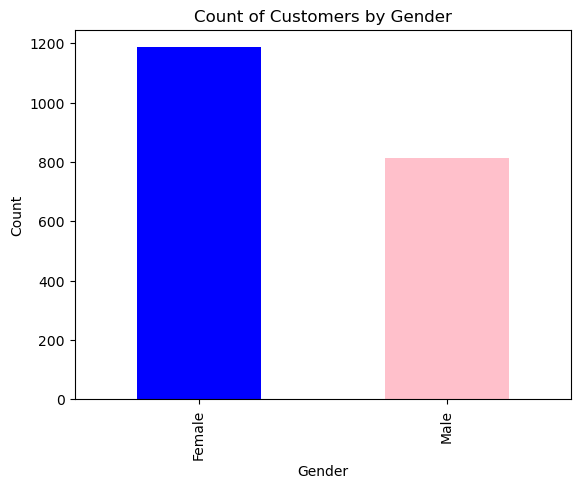

In [32]:
# lets try to visualize the data 
import matplotlib.pyplot as plt

gender_count = df['Gender'].value_counts()

# Plotting the bar chart
gender_count.plot(kind='bar', color=['blue', 'pink'])
plt.title('Count of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [33]:
#lets make an age groups 

bins = [0, 30, 40, 50, 60, 100]
labels = ['0-30', '31-40', '41-50', '51-60', '61+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print(df)

      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size Age Group  
0        Healthcare      

In [36]:
#test some scipy stats spending score between males and females.

from scipy.stats import ttest_ind

male_spending = df[df['Gender'] == 'Male']['Spending Score (1-100)']
female_spending = df[df['Gender'] == 'Female']['Spending Score (1-100)']

t_stat, p_value = ttest_ind(male_spending, female_spending)
print(f'T-statistic: {t_stat}, p-value: {p_value}')


T-statistic: -0.023579089365834763, p-value: 0.9811907063174714


In [40]:
#lets test what I have learned on yesterdays course - train a machine learning model on the training data 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Profession Encoded'] = le.fit_transform(df['Profession'])

X = df[['Age', 'Annual Income ($)', 'Profession Encoded']]
y = df['Spending Score (1-100)']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 782.4526996931277
R^2 Score: -0.01969704590976762
